In [1]:
import analysisHelper
import scipy.optimize as optimize
import datetime
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### SIR Model Explanation

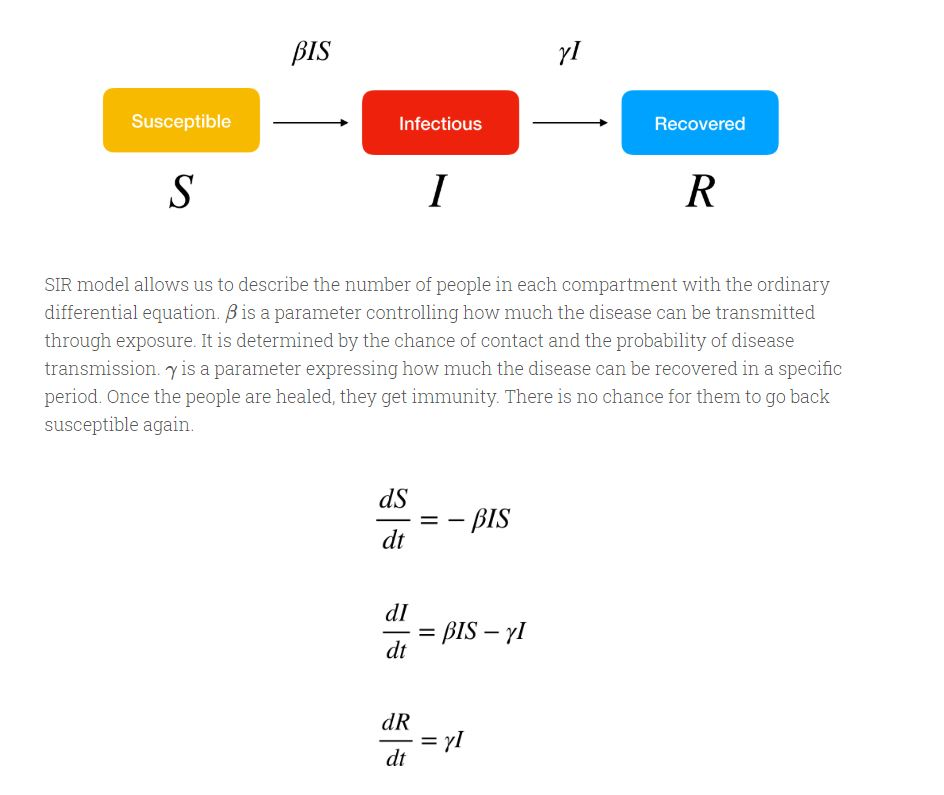

### Modelling
##### Data Used:
1) Time Series of Cumulative Reported Cases by each region (region may be an entire country or single province/state

2) Population of each Region recorded and assumed to be constant throughout - commonly reffered to as <strong>N</strong>

3) Testing Rate per Country - We assume that al states and provinces have the same testing rate as the country (which is a HUGE assumption and might be wrong

4) Susceptible Population per Region: N - Time Series of Cumulative Reported Cases by each region

5) Infected Population per Region: Time Series of Cumulative Reported Cases by each region - Time Series of Cumulative Recovered Cases by each region

6) Recovered Population per Region by each region (region may be an entire country or single province/state


##### Key Definitions:
All definitions expressed as a percentage of total population <strong>N</strong>

1) Currently Infected: Population currently infected

2) Currentlu Recovered: Population that was once infected but now recovered

3) Total Exposed: Population that has already been infected once - regardless of whether they are either still infected, recovered or dead

##### Model Fitting:
Our data is at a daily interval - so within the SIR model we assume $dt=1/365$ i.e 1 day

For every day in our dataset we calculate the implied $\beta$ and $\gamma$. We use the mean of $\beta$ and $\gamma$ over the entire dataset for each region as the parameters of the SIR model for that region.


In [ ]:
temp_adj=273
areas=['Alberta','British Columbia','New Brunswick','Newfoundland and Labrador','Nova Scotia','Ontario','Prince Edward Island','Quebec','Italy','United Kingdom','Germany','France','Australia','Belgium']

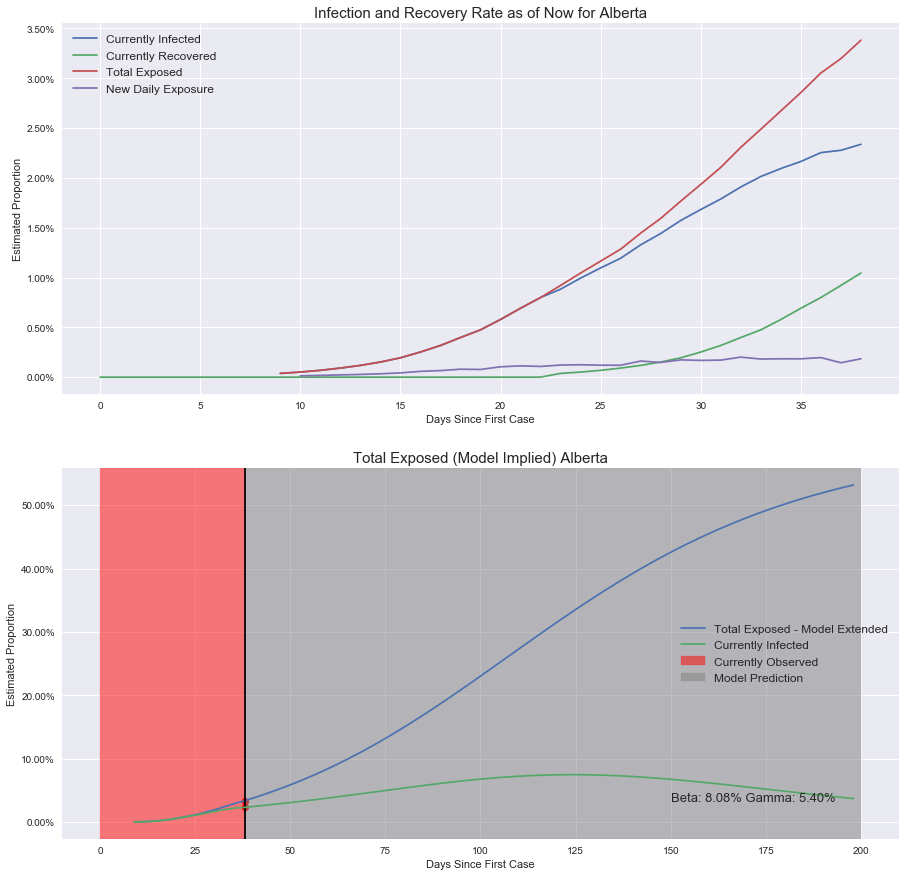

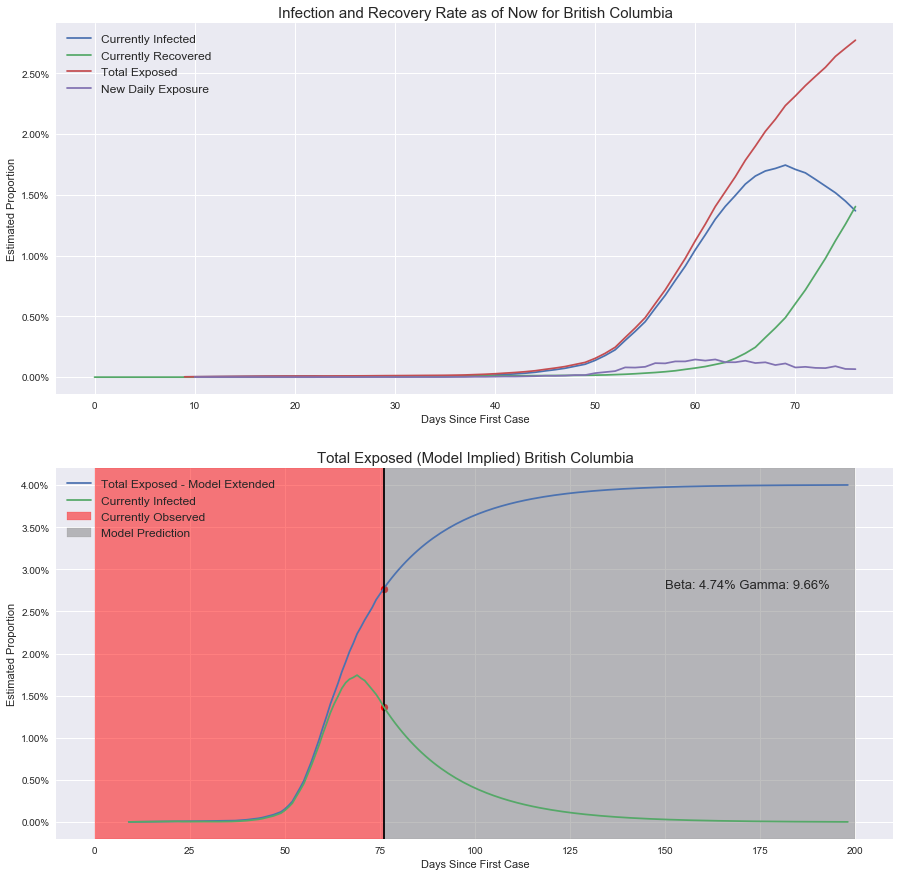

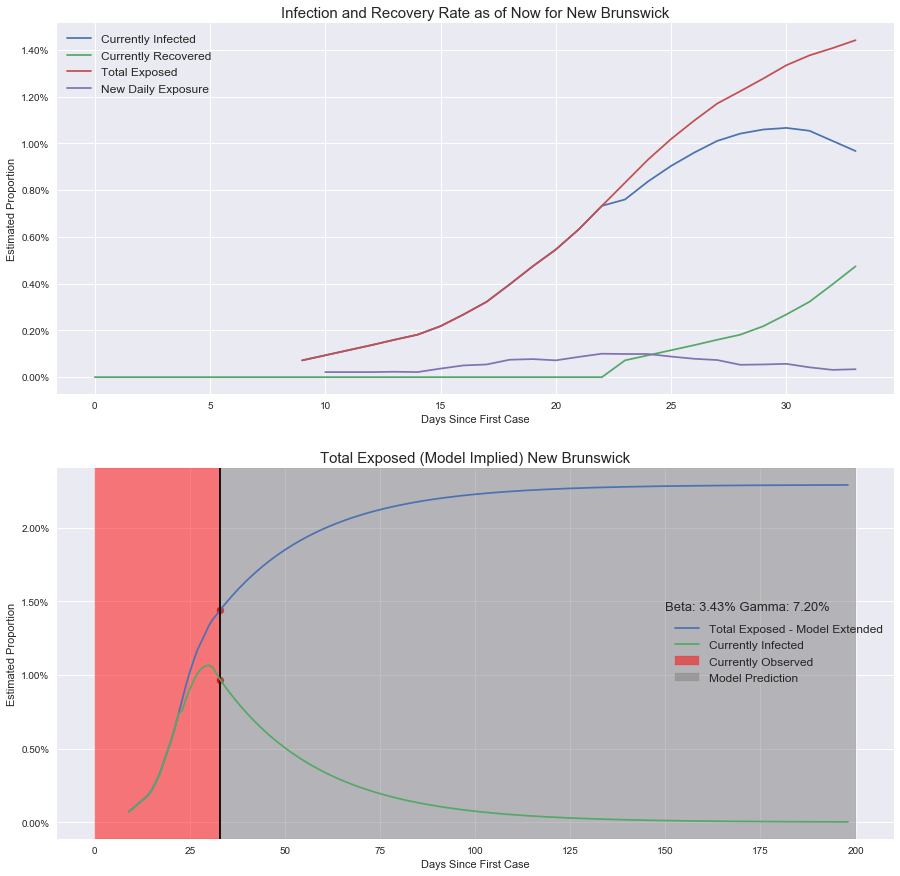

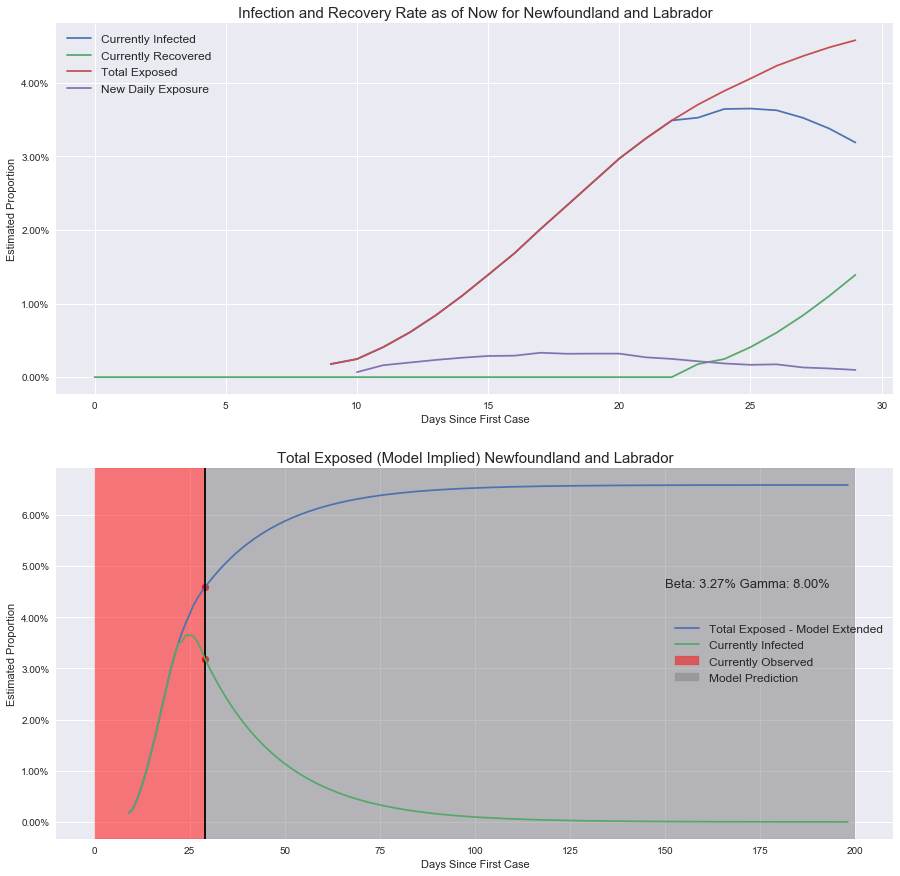

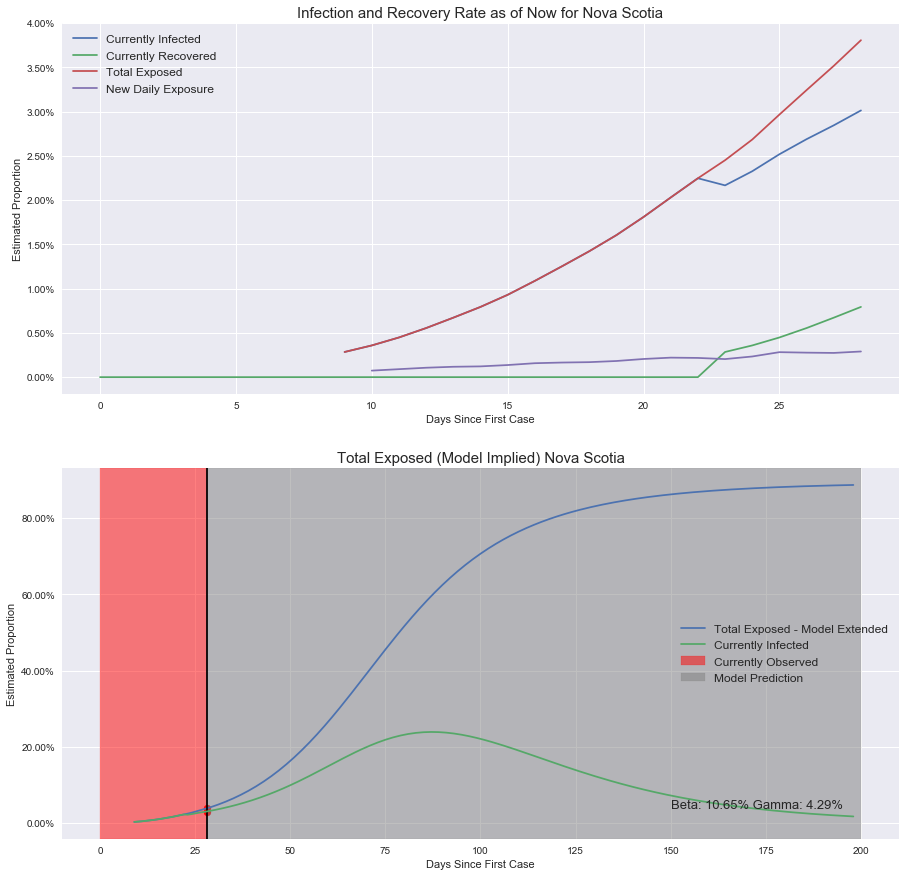

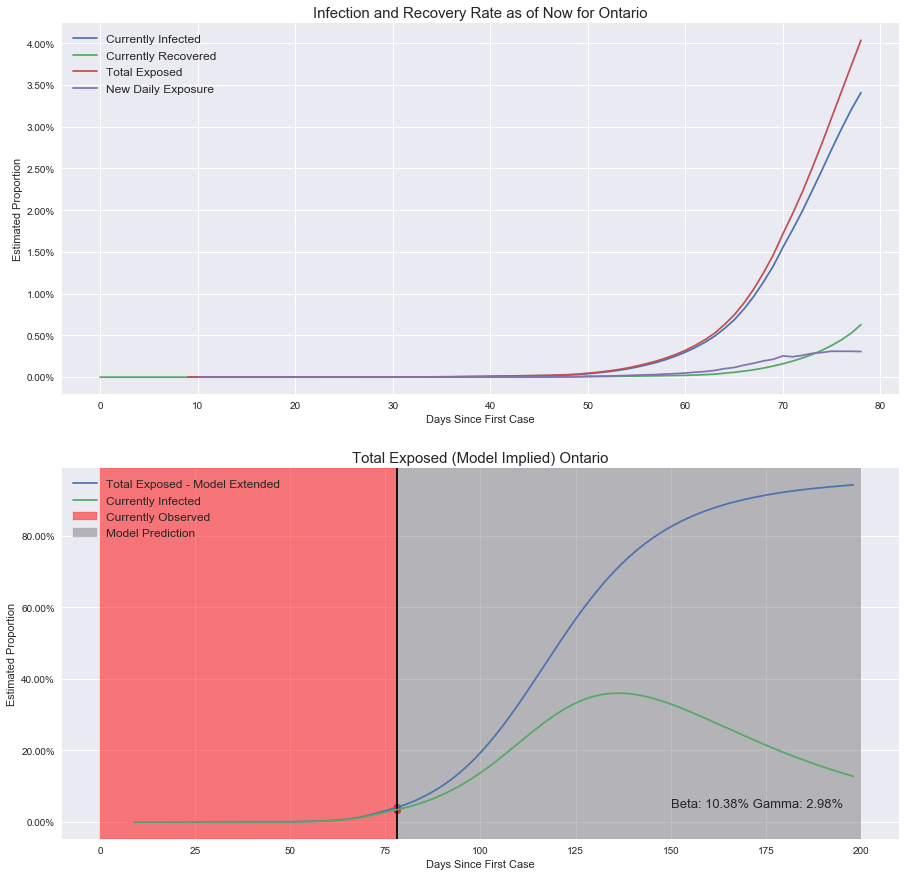

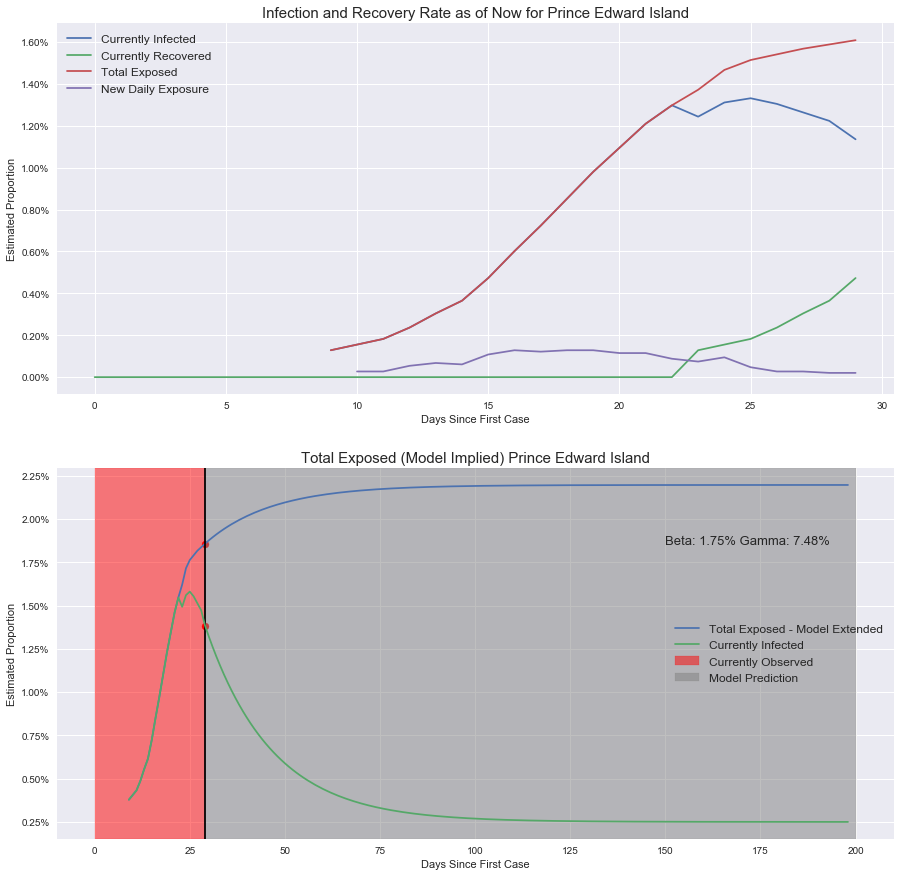

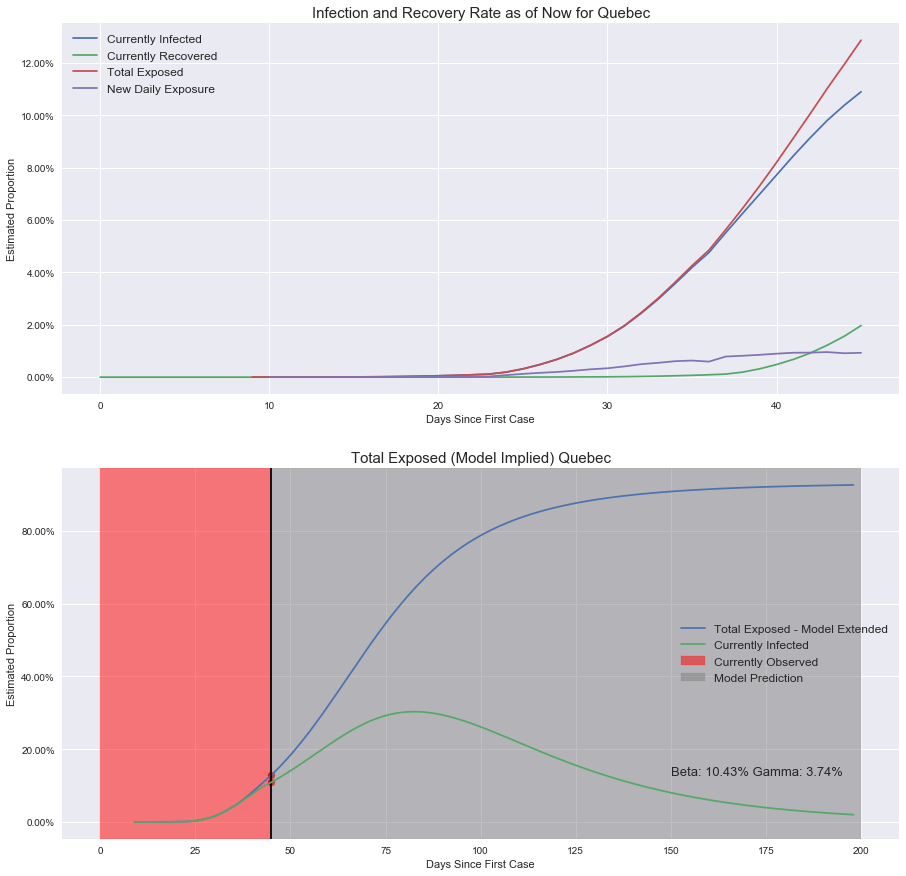

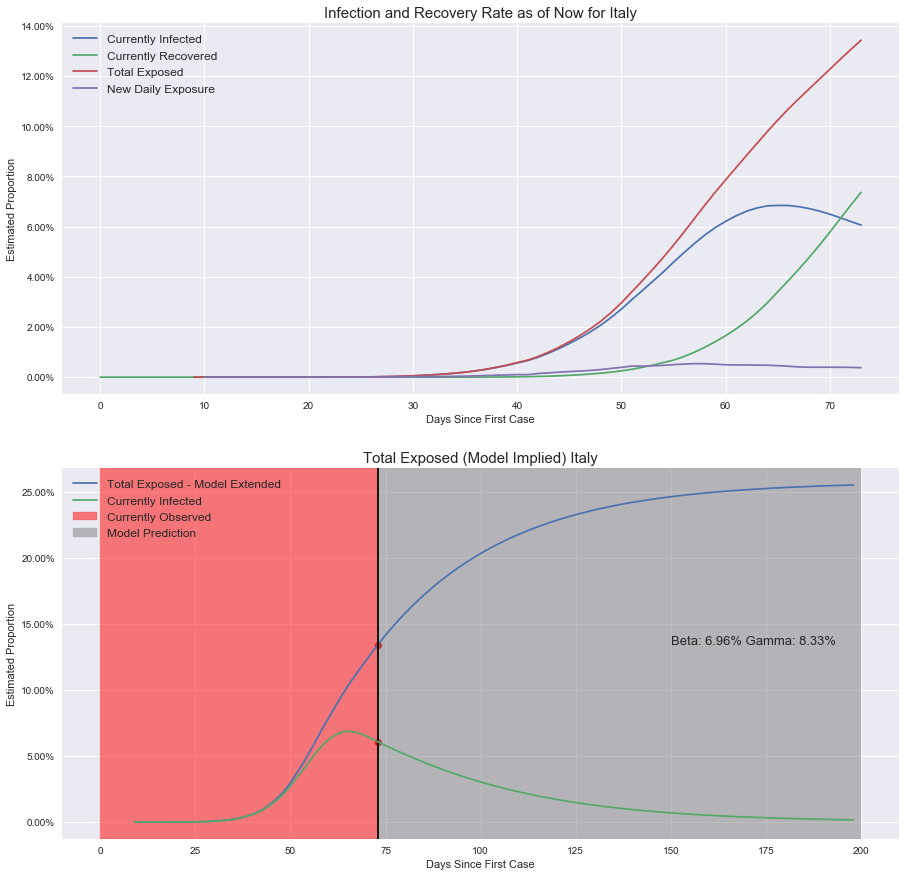

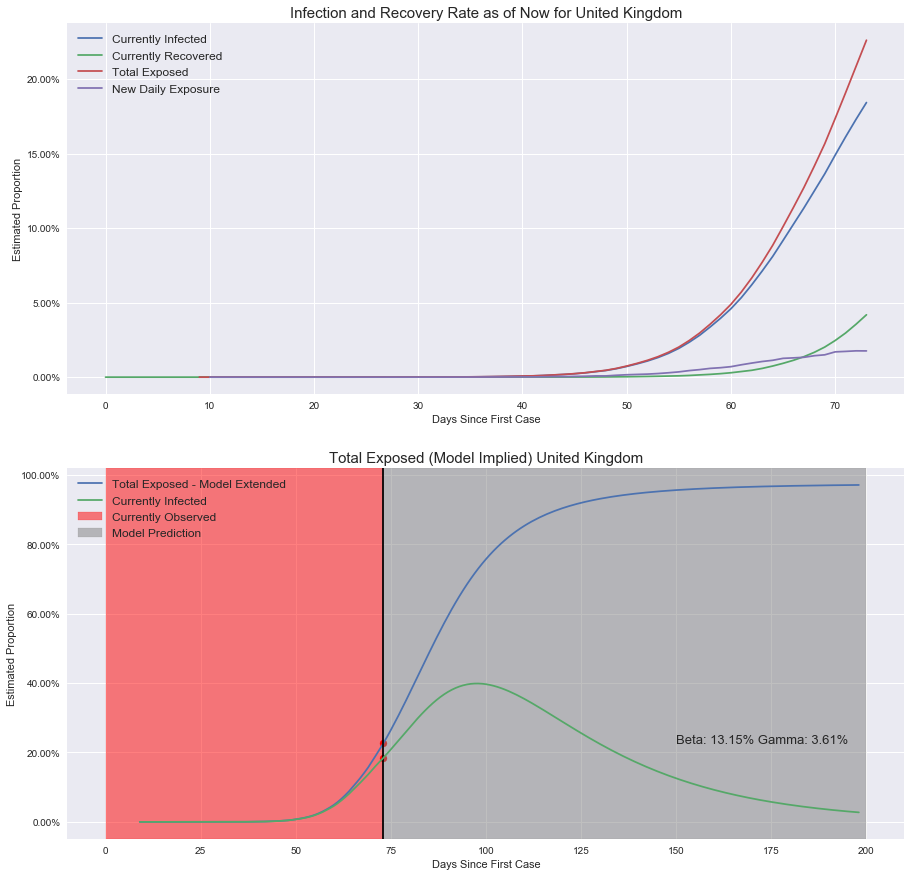

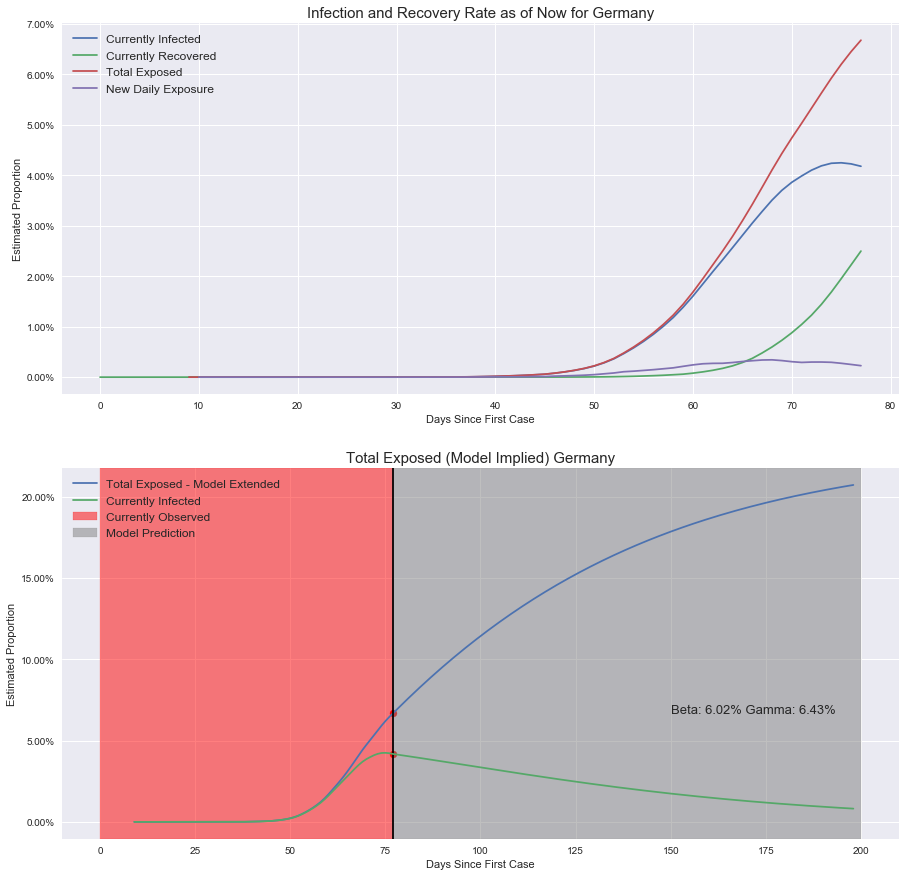

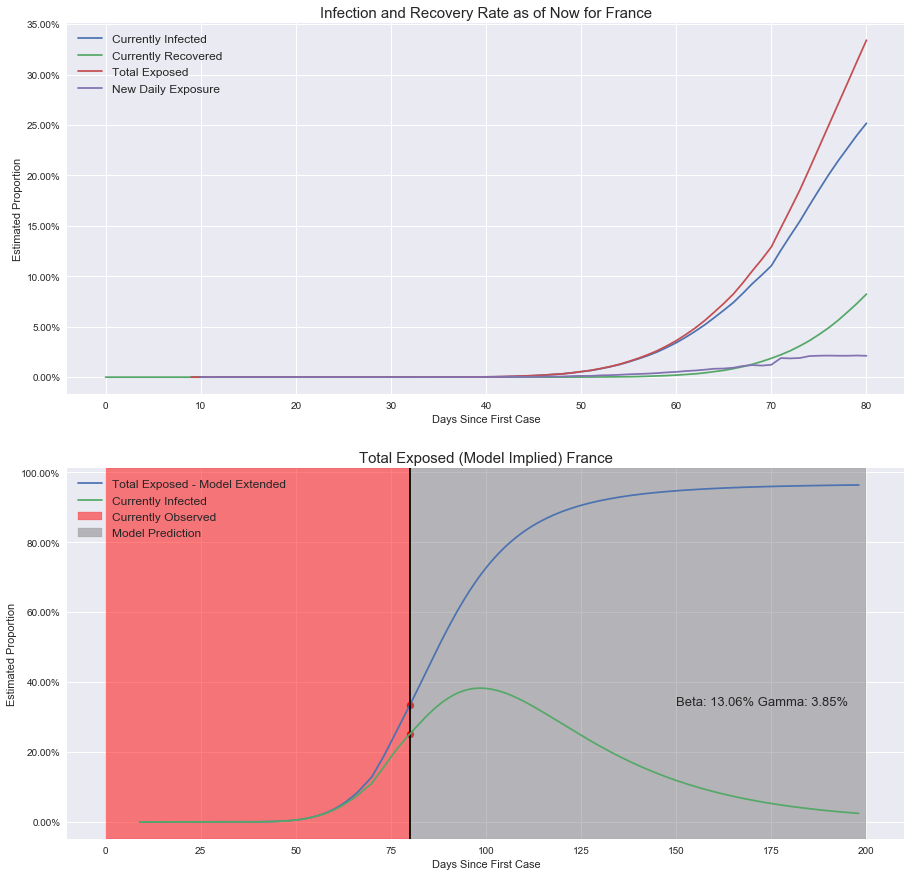

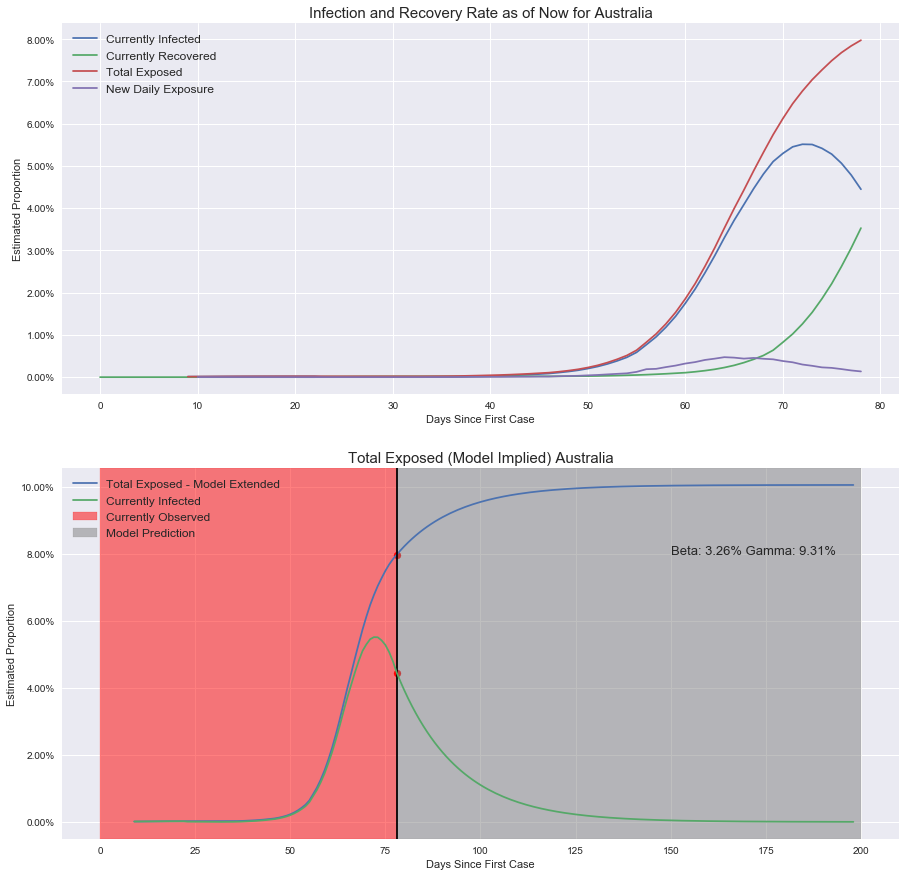

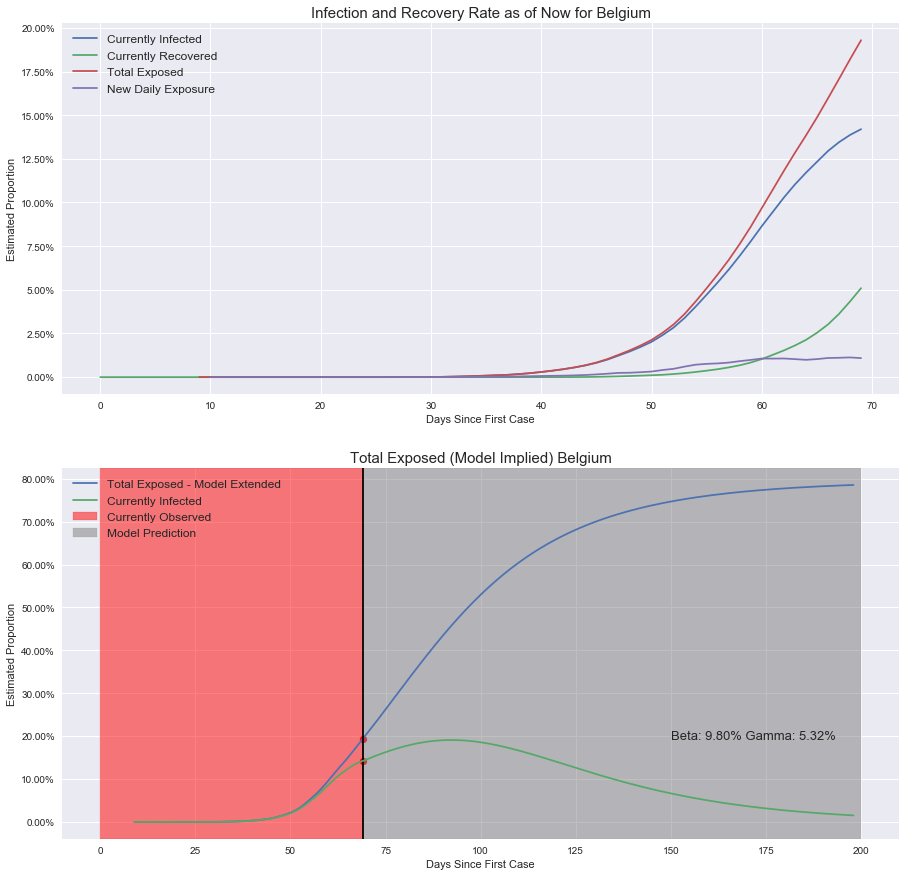

In [8]:
beta_gamma={}
skipped_areas=[]
for area in areas:
    try:
        dic=analysisHelper.info_show(area)
        beta_gamma[area]=dic
    except:
        print('skipped '+area)
        skipped_areas.append(area)

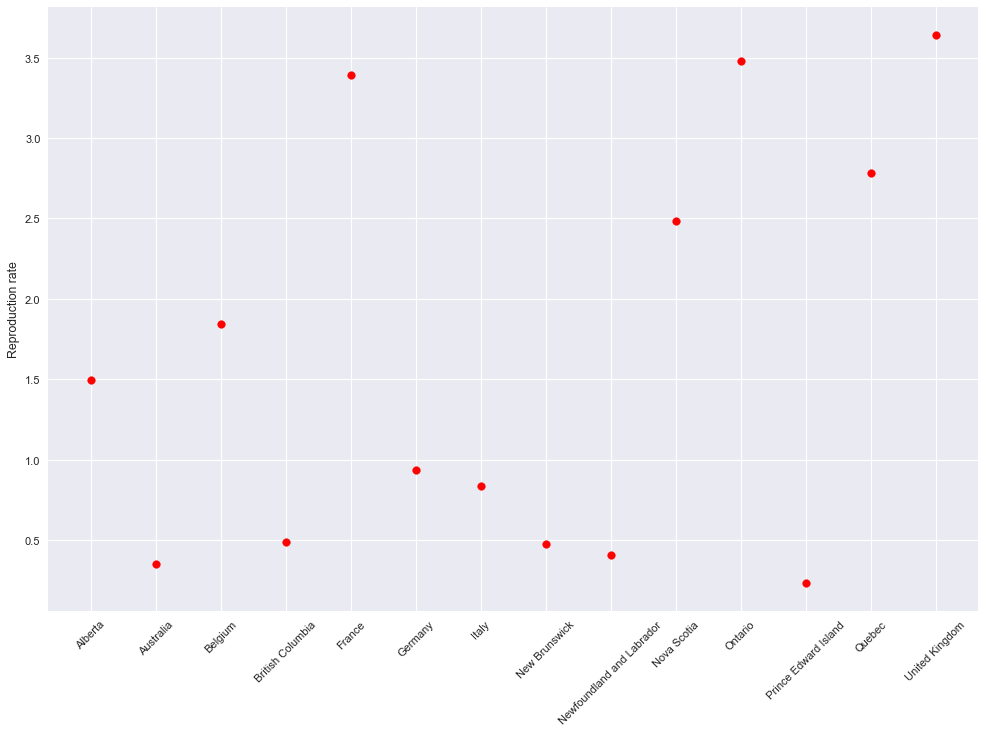

In [14]:
region_desc={}
temp_adj=273

for area in areas:
    try:
        pop=analysisHelper.dataGenerator.region_pop[area]
        sq_area=analysisHelper.dataGenerator.region_areas[area]
        temp_min=analysisHelper.dataGenerator.get_temp_min_area(area)-temp_adj
        humidity=analysisHelper.dataGenerator.get_humidity_area(area)
        dic={'pop':pop,'sq_area':sq_area,'temp_min':temp_min,'humidity':humidity}
        region_desc[area]=dic
    except:
        print('skipped '+area)

descDF=pd.DataFrame.from_dict(region_desc).T   

beta_gammaDF=pd.DataFrame.from_dict(beta_gamma).T
beta_gammaDF['R0']=beta_gammaDF['beta']/beta_gammaDF['gamma']
summaryDF=pd.concat([beta_gammaDF,descDF],axis=1)
summaryDF=summaryDF.sort_values('R0')
plt.figure(figsize=(15, 10), dpi=80)
plt.scatter(list(summaryDF.index), list(summaryDF['R0']),marker='o', color='red')
plt.ylabel('Reproduction rate')
plt.xticks(rotation=45)
summaryDF['Density']=summaryDF['pop']/summaryDF['sq_area']


In [12]:
summaryDF

,beta,gamma,R0,humidity,pop,sq_area,temp_min,Density
Prince Edward Island,0.017524,0.074788,0.234320,24.0,155000.0,5660.0,0.71,27.385159
Australia,0.032565,0.093072,0.349886,72.0,426709.0,2358.0,8.48,180.962256
Newfoundland and Labrador,0.032678,0.079978,0.408588,89.0,524000.0,373000.0,-3.34,1.404826
New Brunswick,0.034316,0.071963,0.476850,90.0,773000.0,71450.0,-1.57,10.818754
British Columbia,0.047379,0.096622,0.490351,59.0,5031000.0,925000.0,16.15,5.438919
Italy,0.069558,0.083267,0.835358,88.0,60000000.0,301338.0,11.26,199.111961
Germany,0.060231,0.064277,0.937051,93.0,83020000.0,357022.0,9.59,232.534690
Alberta,0.080827,0.054020,1.496253,42.0,4333000.0,642000.0,7.15,6.749221
Belgium,0.098001,0.053183,1.842690,94.0,11460000.0,30689.0,7.93,373.423702
Nova Scotia,0.106544,0.042890,2.484123,43.0,965000.0,53300.0,0.71,18.105066
